**Pra Pemrosesan Data**

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

In [181]:
datasets = pd.read_excel('dataKasus-1.xlsx')
datasets

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
557,559,NAMA 558,28 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
558,560,NAMA 559,41 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
559,561,NAMA 560,32 TH,2,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


In [182]:
datasets = datasets.drop(columns=['Unnamed: 12'])

In [183]:
datasets.columns = datasets.columns.str.strip()
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   NO                                561 non-null    int64 
 1   NAMA                              561 non-null    object
 2   USIA                              558 non-null    object
 3   PARITAS                           561 non-null    int64 
 4   JARAK KELAHIRAN                   554 non-null    object
 5   RIW HIPERTENSI                    561 non-null    object
 6   RIW PE                            561 non-null    object
 7   OBESITAS                          561 non-null    object
 8   RIW DM                            561 non-null    object
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object
 10  SOSEK RENDAH                      561 non-null    object
 11  PE/Non PE                         561 non-null    object
dtypes: int64(2), object(10

In [184]:
print(datasets.isnull().sum())

NO                                  0
NAMA                                0
USIA                                3
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


In [185]:
value_counts = datasets['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
28 TH     28
25 TH     24
31 TH     23
29 TH     22
24 TH     21
          ..
30 th      1
23         1
37         1
39 TH      1
14 TH      1
Name: count, Length: 73, dtype: int64


In [186]:
datasets['USIA'] = datasets['USIA'].fillna('')

datasets['USIA'] = datasets['USIA'].str.strip().str.extract('(\d+)')[0]

datasets['USIA'] = pd.to_numeric(datasets['USIA'], errors='coerce')

datasets['USIA'] = datasets['USIA'].fillna(datasets['USIA'].mean())

In [187]:
value_counts = datasets['USIA'].astype(str).value_counts(dropna=False)

print(value_counts)

USIA
31.0                  41
28.0                  41
26.0                  35
25.0                  35
22.0                  35
29.0                  34
24.0                  33
27.0                  27
23.0                  25
30.0                  25
33.0                  23
21.0                  21
32.0                  20
20.0                  20
36.0                  18
35.0                  17
38.0                  15
28.195612431444243    14
34.0                  14
41.0                  11
39.0                  11
19.0                  10
37.0                   9
40.0                   8
17.0                   5
18.0                   5
15.0                   3
16.0                   2
43.0                   2
13.0                   1
14.0                   1
Name: count, dtype: int64


In [188]:
value_counts = datasets['PARITAS'].astype(str).value_counts(dropna=False)
print(value_counts)

PARITAS
1    228
2    186
3     82
0     39
4     20
5      3
6      3
Name: count, dtype: int64


In [189]:
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    260
> 2 tahun       211
< 2 tahun        81
nan               7
> 2 tahun         2
Name: count, dtype: int64


In [190]:
imputer = SimpleImputer(strategy='most_frequent')
from sklearn.preprocessing import LabelEncoder

datasets['JARAK KELAHIRAN'] = imputer.fit_transform(datasets[['JARAK KELAHIRAN']]).ravel()

datasets['JARAK KELAHIRAN'] = datasets['JARAK KELAHIRAN'].replace('> 2 tahun ', '> 2 tahun')

In [191]:
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
anak pertama    267
> 2 tahun       213
< 2 tahun        81
Name: count, dtype: int64


In [192]:
value_counts = datasets['RIW HIPERTENSI'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW HIPERTENSI
Tidak    508
Ya        53
Name: count, dtype: int64


In [193]:
value_counts = datasets['RIW PE'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW PE
Tidak                     526
PEB                        19
PE                          6
HELLP SYNDROM               2
Impending PE                2
Impending Eklamsia          1
Kejang Konvulsi             1
impending eklamsia          1
PE, HELLP Syndrome          1
PEB impending eklampsi      1
Impending Ekalmsia          1
Name: count, dtype: int64


In [194]:
datasets['RIW PE'] = datasets['RIW PE'].replace(
    to_replace=['PEB', 'PE', 'HELLP SYNDROM', 'Impending PE', 'Impending Eklamsia', 'PE, HELLP Syndrome', 'PEB impending eklampsi', 'Impending Ekalmsia', 'Kejang Konvulsi', 'impending eklamsia'],
    value='Ada'
)

In [195]:
value_counts = datasets['RIW PE'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW PE
Tidak    526
Ada       35
Name: count, dtype: int64


In [196]:
value_counts = datasets['OBESITAS'].astype(str).value_counts(dropna=False)

print(value_counts)

OBESITAS
Tidak    556
Ya         5
Name: count, dtype: int64


In [197]:
value_counts = datasets['RIW DM'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW DM
Tidak    556
Ya         5
Name: count, dtype: int64


In [198]:
value_counts = datasets['RIW HIPERTENSI/PE DALAM KELUARGA'].astype(str).value_counts(dropna=False)

print(value_counts)

RIW HIPERTENSI/PE DALAM KELUARGA
Tidak    550
Ada       11
Name: count, dtype: int64


In [199]:
value_counts = datasets['SOSEK RENDAH'].astype(str).value_counts(dropna=False)

print(value_counts)

SOSEK RENDAH
>UMR    557
<UMR      4
Name: count, dtype: int64


In [200]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE                    520
PEB                        20
PE                         17
Eklamsia                    1
PE gemelli                  1
PEB impending eklampsi      1
PE                          1
Name: count, dtype: int64


In [201]:
datasets['PE/Non PE'] = datasets['PE/Non PE'].replace(
    to_replace=['PEB', 'PE', 'Eklamsia', 'PE gemelli', 'PEB impending eklampsi', 'PE '],
    value='PE'
)

In [202]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
Non PE    520
PE         41
Name: count, dtype: int64


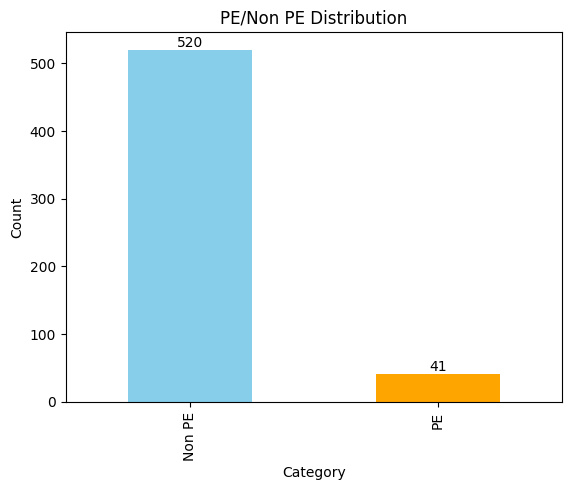

In [203]:
import pandas as pd
import matplotlib.pyplot as plt

value_counts = datasets['PE/Non PE'].value_counts()

ax = value_counts.plot(kind='bar', color=['skyblue', 'orange'])

plt.title('PE/Non PE Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

for i, count in enumerate(value_counts):
    ax.text(i, count , str(count), ha='center', va='bottom')

plt.show()

In [204]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NO                                561 non-null    int64  
 1   NAMA                              561 non-null    object 
 2   USIA                              561 non-null    float64
 3   PARITAS                           561 non-null    int64  
 4   JARAK KELAHIRAN                   561 non-null    object 
 5   RIW HIPERTENSI                    561 non-null    object 
 6   RIW PE                            561 non-null    object 
 7   OBESITAS                          561 non-null    object 
 8   RIW DM                            561 non-null    object 
 9   RIW HIPERTENSI/PE DALAM KELUARGA  561 non-null    object 
 10  SOSEK RENDAH                      561 non-null    object 
 11  PE/Non PE                         561 non-null    object 
dtypes: float

**Konversi Nilai ke Numerik**

In [205]:
value_counts = datasets['PARITAS'].astype(str).value_counts(dropna=False)

print(value_counts)

PARITAS
1    228
2    186
3     82
0     39
4     20
5      3
6      3
Name: count, dtype: int64


In [206]:
label_encoder = LabelEncoder()
datasets['JARAK KELAHIRAN'] = label_encoder.fit_transform(datasets['JARAK KELAHIRAN'])

In [207]:
value_counts = datasets['JARAK KELAHIRAN'].astype(str).value_counts(dropna=False)

print(value_counts)

JARAK KELAHIRAN
2    267
1    213
0     81
Name: count, dtype: int64


In [208]:
from sklearn.preprocessing import OneHotEncoder

In [209]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(datasets[['RIW HIPERTENSI']])

one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

datasets = pd.concat([datasets.drop('RIW HIPERTENSI', axis=1), one_hot_df], axis=1)

In [210]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(datasets[['RIW PE']])

one_hot_columns = encoder.get_feature_names_out(['RIW PE'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

datasets = pd.concat([datasets.drop('RIW PE', axis=1), one_hot_df], axis=1)

In [211]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(datasets[['OBESITAS']])

one_hot_columns = encoder.get_feature_names_out(['OBESITAS'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

datasets = pd.concat([datasets.drop('OBESITAS', axis=1), one_hot_df], axis=1)

In [212]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(datasets[['RIW DM']])

one_hot_columns = encoder.get_feature_names_out(['RIW DM'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

datasets = pd.concat([datasets.drop('RIW DM', axis=1), one_hot_df], axis=1)

In [213]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(datasets[['RIW HIPERTENSI/PE DALAM KELUARGA']])

one_hot_columns = encoder.get_feature_names_out(['RIW HIPERTENSI/PE DALAM KELUARGA'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

datasets = pd.concat([datasets.drop('RIW HIPERTENSI/PE DALAM KELUARGA', axis=1), one_hot_df], axis=1)

In [214]:
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(datasets[['SOSEK RENDAH']])

one_hot_columns = encoder.get_feature_names_out(['SOSEK RENDAH'])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

datasets = pd.concat([datasets.drop('SOSEK RENDAH', axis=1), one_hot_df], axis=1)

In [215]:
datasets['PE/Non PE'] = label_encoder.fit_transform(datasets['PE/Non PE'])

In [216]:
value_counts = datasets['PE/Non PE'].astype(str).value_counts(dropna=False)

print(value_counts)

PE/Non PE
0    520
1     41
Name: count, dtype: int64


In [217]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   NO                                      561 non-null    int64  
 1   NAMA                                    561 non-null    object 
 2   USIA                                    561 non-null    float64
 3   PARITAS                                 561 non-null    int64  
 4   JARAK KELAHIRAN                         561 non-null    int64  
 5   PE/Non PE                               561 non-null    int64  
 6   RIW HIPERTENSI_Tidak                    561 non-null    float64
 7   RIW HIPERTENSI_Ya                       561 non-null    float64
 8   RIW PE_Ada                              561 non-null    float64
 9   RIW PE_Tidak                            561 non-null    float64
 10  OBESITAS_Tidak                          561 non-null    float6

In [218]:
datasets

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
557,559,NAMA 558,28.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
558,560,NAMA 559,41.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
559,561,NAMA 560,32.0,2,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0



---Exploratory Data Analysis---
Descriptive Statistics:
                NO        USIA     PARITAS  JARAK KELAHIRAN   PE/Non PE  \
count  561.000000  561.000000  561.000000       561.000000  561.000000   
mean   281.859180   28.195612    1.709447         1.331551    0.073084   
std    162.301009    5.858765    1.012105         0.715057    0.260506   
min      1.000000   13.000000    0.000000         0.000000    0.000000   
25%    142.000000   24.000000    1.000000         1.000000    0.000000   
50%    282.000000   28.000000    2.000000         1.000000    0.000000   
75%    422.000000   32.000000    2.000000         2.000000    0.000000   
max    562.000000   43.000000    6.000000         2.000000    1.000000   

       RIW HIPERTENSI_Tidak  RIW HIPERTENSI_Ya  RIW PE_Ada  RIW PE_Tidak  \
count            561.000000         561.000000  561.000000    561.000000   
mean               0.905526           0.094474    0.062389      0.937611   
std                0.292748           0.292748 

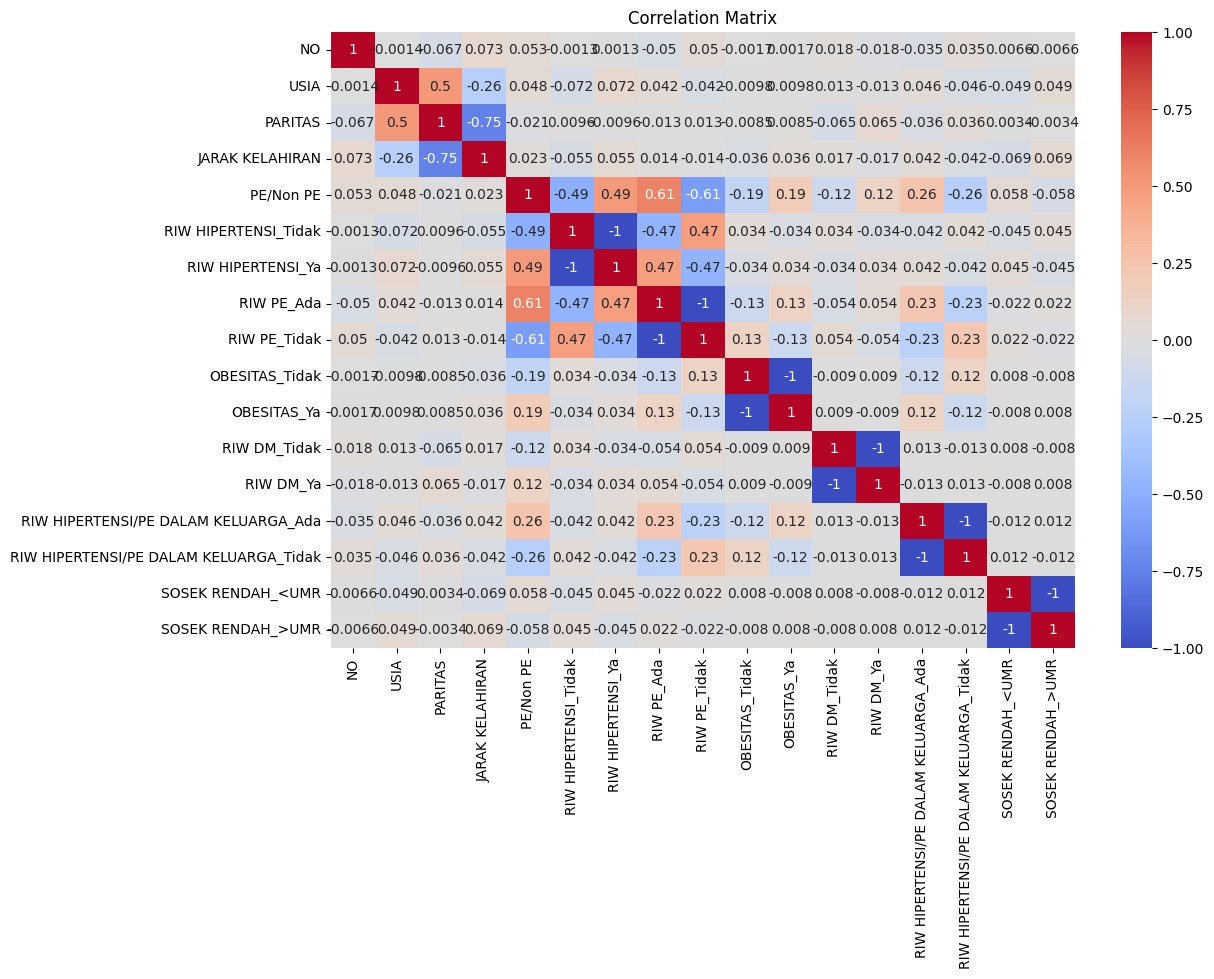

In [219]:
print("\n---Exploratory Data Analysis---")

print("Descriptive Statistics:\n", datasets.describe())

numeric_datasets = datasets.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_datasets.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

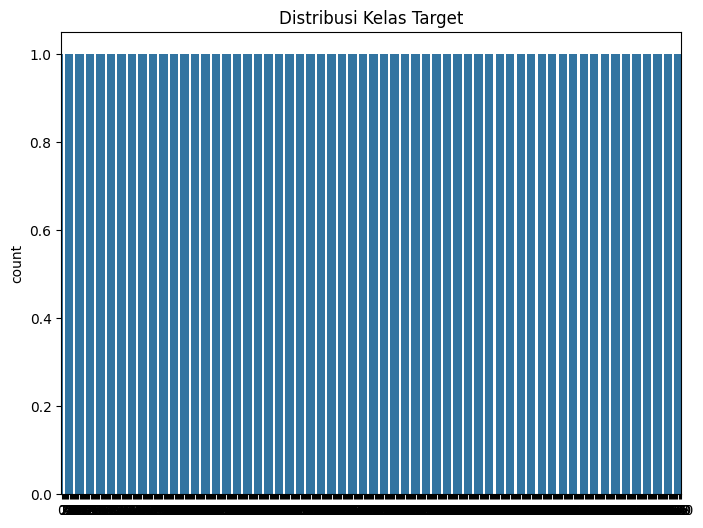

In [220]:
data_cleaned = datasets
target_column_name = 'PE/Non PE'

plt.figure(figsize=(8, 6))
sns.countplot(data_cleaned[target_column_name])
plt.title("Distribusi Kelas Target")
plt.show()

In [221]:
!pip install scikit-learn pandas numpy

In [222]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

print("\n---Feature Selection---")

X = datasets.drop(columns=['PE/Non PE'])
y = datasets['PE/Non PE']

non_numeric_columns = X.select_dtypes(exclude=['number']).columns

X = X.drop(columns=non_numeric_columns)

model = DecisionTreeClassifier(random_state=42)
selector = RFE(model, n_features_to_select=15, step=1)

X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)


---Feature Selection---
Selected Features: Index(['NO', 'USIA', 'PARITAS', 'JARAK KELAHIRAN', 'RIW HIPERTENSI_Tidak',
       'RIW PE_Ada', 'RIW PE_Tidak', 'OBESITAS_Tidak', 'OBESITAS_Ya',
       'RIW DM_Tidak', 'RIW DM_Ya', 'RIW HIPERTENSI/PE DALAM KELUARGA_Ada',
       'RIW HIPERTENSI/PE DALAM KELUARGA_Tidak', 'SOSEK RENDAH_<UMR',
       'SOSEK RENDAH_>UMR'],
      dtype='object')


In [223]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [224]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)
X_train_selected = scaler.fit_transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Naive Bayes': GaussianNB(),
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        'accuracy': accuracy,
        'report': report
    }


results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Naive Bayes': {'accuracy': 0.8994082840236687,
  'report': {'0': {'precision': 0.9722222222222222,
    'recall': 0.9150326797385621,
    'f1-score': 0.9427609427609428,
    'support': 153.0},
   '1': {'precision': 0.48,
    'recall': 0.75,
    'f1-score': 0.5853658536585366,
    'support': 16.0},
   'accuracy': 0.8994082840236687,
   'macro avg': {'precision': 0.7261111111111112,
    'recall': 0.832516339869281,
    'f1-score': 0.7640633982097397,
    'support': 169.0},
   'weighted avg': {'precision': 0.925621301775148,
    'recall': 0.8994082840236687,
    'f1-score': 0.9089247213074606,
    'support': 169.0}}},
 'K-NN': {'accuracy': 0.9053254437869822,
  'report': {'0': {'precision': 0.9053254437869822,
    'recall': 1.0,
    'f1-score': 0.9503105590062112,
    'support': 153.0},
   '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0},
   'accuracy': 0.9053254437869822,
   'macro avg': {'precision': 0.4526627218934911,
    'recall': 0.5,
    'f1-score': 0.47515

In [226]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_train, y_train)

selected_features = [X_train.columns[i] for i in selector.get_support(indices=True)]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
selected_features

['RIW HIPERTENSI_Tidak',
 'RIW HIPERTENSI_Ya',
 'RIW PE_Ada',
 'RIW PE_Tidak',
 'RIW HIPERTENSI/PE DALAM KELUARGA_Ada']

In [227]:
selected_results = {}

for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred_selected = model.predict(X_test_selected)
    accuracy_selected = accuracy_score(y_test, y_pred_selected)
    report_selected = classification_report(y_test, y_pred_selected, output_dict=True)
    selected_results[model_name] = {
        'accuracy': accuracy_selected,
        'report': report_selected
    }

comparison_results = {
    'Original': results,
    'Selected Features': selected_results
}
comparison_results

{'Original': {'Naive Bayes': {'accuracy': 0.8994082840236687,
   'report': {'0': {'precision': 0.9722222222222222,
     'recall': 0.9150326797385621,
     'f1-score': 0.9427609427609428,
     'support': 153.0},
    '1': {'precision': 0.48,
     'recall': 0.75,
     'f1-score': 0.5853658536585366,
     'support': 16.0},
    'accuracy': 0.8994082840236687,
    'macro avg': {'precision': 0.7261111111111112,
     'recall': 0.832516339869281,
     'f1-score': 0.7640633982097397,
     'support': 169.0},
    'weighted avg': {'precision': 0.925621301775148,
     'recall': 0.8994082840236687,
     'f1-score': 0.9089247213074606,
     'support': 169.0}}},
  'K-NN': {'accuracy': 0.9053254437869822,
   'report': {'0': {'precision': 0.9053254437869822,
     'recall': 1.0,
     'f1-score': 0.9503105590062112,
     'support': 153.0},
    '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 16.0},
    'accuracy': 0.9053254437869822,
    'macro avg': {'precision': 0.4526627218934911,
    

In [228]:
!pip install scikit-learn

In [229]:
from sklearn.model_selection import cross_val_score

scores_full = {}
scores_selected = {}

for model_name, model in models.items():

    cv_scores_full = cross_val_score(model, X_train, y_train, cv=5)
    scores_full[model_name] = (cv_scores_full.mean(), cv_scores_full.std())

    cv_scores_selected = cross_val_score(model, X_train_selected, y_train, cv=5)
    scores_selected[model_name] = (cv_scores_selected.mean(), cv_scores_selected.std())

In [230]:
print("\n---Comparison Analysis---")
for name in models.keys():
    print(f"{name}:")
    print(f"Original Data - Mean CV Score: {scores_full[name][0]:.4f} ± {scores_full[name][1]:.4f}")
    print(f"Selected Data - Mean CV Score: {scores_selected[name][0]:.4f} ± {scores_selected[name][1]:.4f}")
    print()


---Comparison Analysis---
Naive Bayes:
Original Data - Mean CV Score: 0.7415 ± 0.3521
Selected Data - Mean CV Score: 0.9262 ± 0.0242

K-NN:
Original Data - Mean CV Score: 0.9362 ± 0.0004
Selected Data - Mean CV Score: 0.9541 ± 0.0172

Decision Tree:
Original Data - Mean CV Score: 0.9389 ± 0.0243
Selected Data - Mean CV Score: 0.9593 ± 0.0186



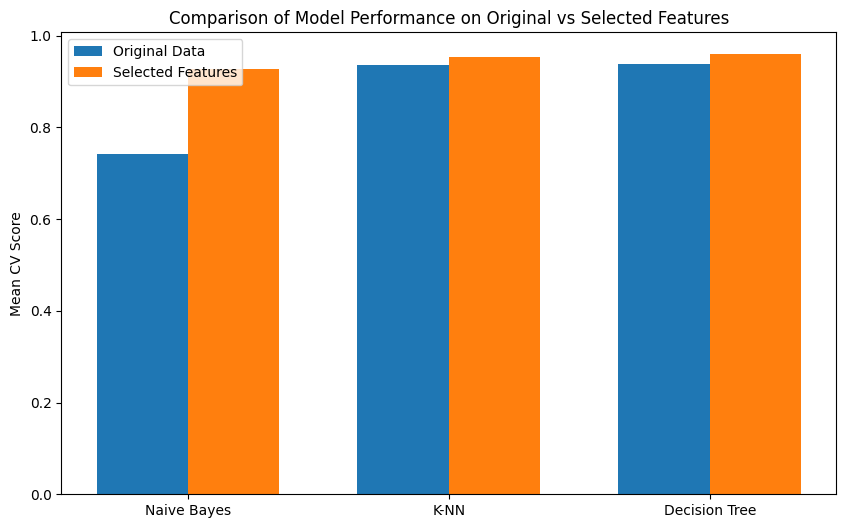

In [231]:
labels = list(models.keys())
original_scores = [scores_full[model][0] for model in labels]
selected_scores = [scores_selected[model][0] for model in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, original_scores, width, label='Original Data')
rects2 = ax.bar(x + width/2, selected_scores, width, label='Selected Features')

ax.set_ylabel('Mean CV Score')
ax.set_title('Comparison of Model Performance on Original vs Selected Features')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [232]:
def generate_report(comparison_results, scores_full, scores_selected):

  report = ""

  for model_name in comparison_results['Original'].keys():
    report += f"**{model_name}:**\n"
    report += "- **Dataset Asli:** Akurasi sebesar {:.2f}%\n".format(
        comparison_results['Original'][model_name]['accuracy'] * 100)
    report += "- **Dataset dengan Fitur Terpilih:** Akurasi sebesar {:.2f}%\n".format(
        comparison_results['Selected Features'][model_name]['accuracy'] * 100)

    original_precision = comparison_results['Original'][model_name]['report']['1']['precision']
    selected_precision = comparison_results['Selected Features'][model_name]['report']['1']['precision']
    report += f"- Presisi (kelas 1): Asli: {original_precision:.2f}, Fitur Terpilih: {selected_precision:.2f}\n"

    original_recall = comparison_results['Original'][model_name]['report']['1']['recall']
    selected_recall = comparison_results['Selected Features'][model_name]['report']['1']['recall']
    report += f"- Recall (kelas 1): Asli: {original_recall:.2f}, Fitur Terpilih: {selected_recall:.2f}\n"

    original_f1 = comparison_results['Original'][model_name]['report']['1']['f1-score']
    selected_f1 = comparison_results['Selected Features'][model_name]['report']['1']['f1-score']
    report += f"- F1-score (kelas 1): Asli: {original_f1:.2f}, Fitur Terpilih: {selected_f1:.2f}\n"

  report += "### Analisis Cross-Validation\n\n"
  for model_name in scores_full.keys():
    report += f"**{model_name}:**\n"
    report += f"- **Dataset Asli:** Skor CV rata-rata: {scores_full[model_name][0]:.4f} ± {scores_full[model_name][1]:.4f}\n"
    report += f"- **Dataset dengan Fitur Terpilih:** Skor CV rata-rata: {scores_selected[model_name][0]:.4f} ± {scores_selected[model_name][1]:.4f}\n"

  return report

report = generate_report(comparison_results, scores_full, scores_selected)
report

'**Naive Bayes:**\n- **Dataset Asli:** Akurasi sebesar 89.94%\n- **Dataset dengan Fitur Terpilih:** Akurasi sebesar 89.94%\n- Presisi (kelas 1): Asli: 0.48, Fitur Terpilih: 0.48\n- Recall (kelas 1): Asli: 0.75, Fitur Terpilih: 0.75\n- F1-score (kelas 1): Asli: 0.59, Fitur Terpilih: 0.59\n**K-NN:**\n- **Dataset Asli:** Akurasi sebesar 90.53%\n- **Dataset dengan Fitur Terpilih:** Akurasi sebesar 92.90%\n- Presisi (kelas 1): Asli: 0.00, Fitur Terpilih: 0.70\n- Recall (kelas 1): Asli: 0.00, Fitur Terpilih: 0.44\n- F1-score (kelas 1): Asli: 0.00, Fitur Terpilih: 0.54\n**Decision Tree:**\n- **Dataset Asli:** Akurasi sebesar 91.72%\n- **Dataset dengan Fitur Terpilih:** Akurasi sebesar 92.90%\n- Presisi (kelas 1): Asli: 0.58, Fitur Terpilih: 0.70\n- Recall (kelas 1): Asli: 0.44, Fitur Terpilih: 0.44\n- F1-score (kelas 1): Asli: 0.50, Fitur Terpilih: 0.54\n### Analisis Cross-Validation\n\n**Naive Bayes:**\n- **Dataset Asli:** Skor CV rata-rata: 0.7415 ± 0.3521\n- **Dataset dengan Fitur Terpilih